In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tree_data = pd.read_csv("Week 40 - US Christmas Tree Sales - 2010 to 2016.csv")

In [3]:
tree_data.head()

,index,Year,Type of tree,Number of trees sold,Average Tree Price,Sales
0,0,2010,Real tree,27000000,36.12,975240000
1,1,2011,Real tree,30800000,34.87,1073996000
2,2,2012,Real tree,24500000,40.30,987350000
3,3,2013,Real tree,33020000,35.30,1165606000
4,4,2014,Real tree,26300000,39.50,1038850000


In [4]:
tree_data.info()
tree_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 14 non-null     int64  
 1   Year                  14 non-null     int64  
 2   Type of tree          14 non-null     object 
 3   Number of trees sold  14 non-null     int64  
 4   Average Tree Price    14 non-null     float64
 5   Sales                 14 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 804.0+ bytes


index                   0
Year                    0
Type of tree            0
Number of trees sold    0
Average Tree Price      0
Sales                   0
dtype: int64

In [5]:
tree_data.dtypes

index                     int64
Year                      int64
Type of tree             object
Number of trees sold      int64
Average Tree Price      float64
Sales                     int64
dtype: object

In [6]:
tree_data.describe()

,index,Year,Number of trees sold,Average Tree Price,Sales
count,14.0000,14.000000,1.400000e+01,14.000000,1.400000e+01
mean,6.5000,2013.000000,2.023000e+07,59.446429,1.098326e+09
std,4.1833,2.075498,8.502216e+06,20.110086,4.148357e+08
min,0.0000,2010.000000,8.200000e+06,34.870000,5.298020e+08
25%,3.2500,2011.250000,1.285000e+07,39.700000,8.714475e+08
50%,6.5000,2013.000000,2.155000e+07,64.105000,1.013100e+09
75%,9.7500,2014.750000,2.682500e+07,72.012500,1.187734e+09
max,13.0000,2016.000000,3.302000e+07,98.700000,2.046780e+09


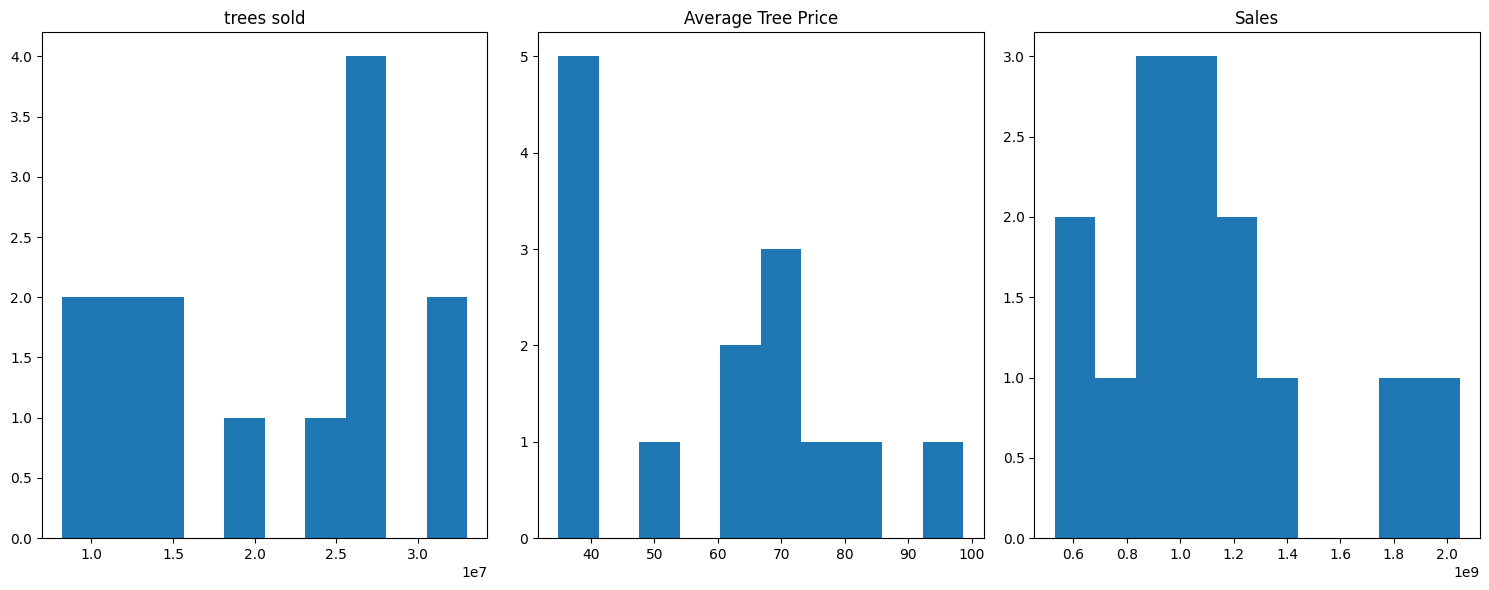

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.hist(tree_data['Number of trees sold'])
plt.title('trees sold')

plt.subplot(1,3,2)
plt.hist(tree_data['Average Tree Price'])
plt.title('Average Tree Price')

plt.subplot(1,3,3)
plt.hist(tree_data['Sales'])
plt.title('Sales')
plt.tight_layout()
plt.show()

The distribution fo the Average Price seems to be skewed right and it's totally fine because 40 is the cheapest price.

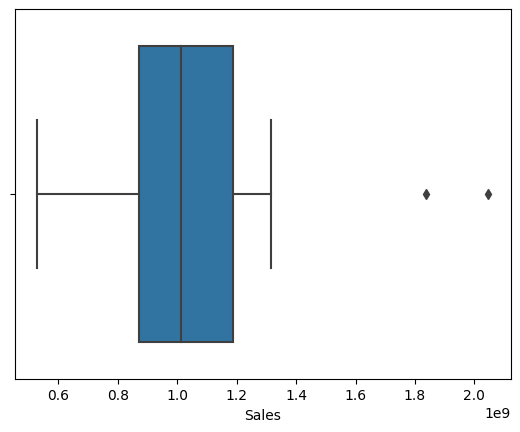

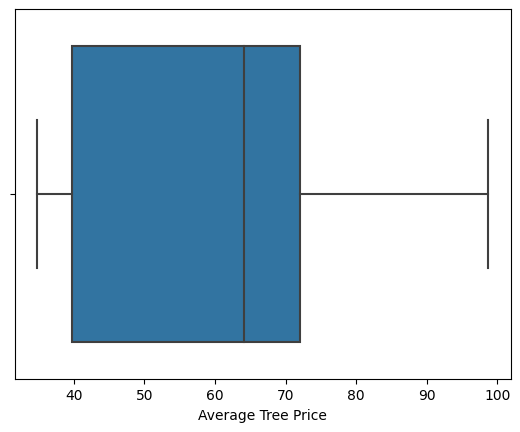

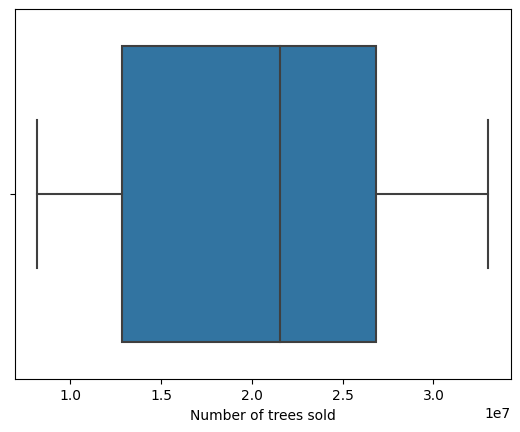

In [8]:

sns.boxplot(x='Sales', data=tree_data)
plt.show()
sns.boxplot(x='Average Tree Price', data=tree_data)
plt.show()
sns.boxplot(x='Number of trees sold', data=tree_data)
plt.show()

In [9]:
def detect_outliers_iqr(data, column):
    Q1 = tree_data['Sales'].quantile(0.25)
    Q3 = tree_data['Sales'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return tree_data[(tree_data['Sales'] < lower_bound) | (tree_data['Sales'] > upper_bound)]

# Trouver les outliers pour la colonne 'PRICE'
outliers = detect_outliers_iqr(tree_data, 'Sales')

# Afficher les outliers
print("Outliers détectés:")
print(outliers)

Outliers détectés:
    index  Year Type of tree  Number of trees sold  Average Tree Price  \
6       6  2016    Real tree              27400000                74.7   
13     13  2016    Fake tree              18600000                98.7   

         Sales  
6   2046780000  
13  1835820000  


2 billions of sales and 1 millions 8 thousand of sales sounds big especially for an average Tree Price of 74.7 and 98.7

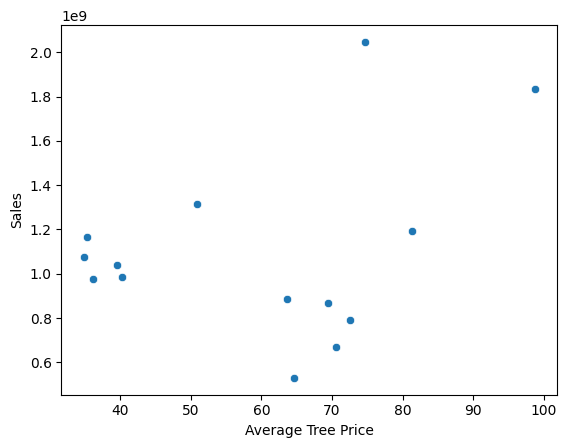

In [15]:
# relation between Average Tree Price and Sales 
sns.scatterplot(data=tree_data, x="Average Tree Price", y="Sales")
plt.show()

In [17]:
correlation_coefficient = tree_data['Average Tree Price'].corr(tree_data['Sales'])
print(correlation_coefficient)

0.31268969010082714


In [ ]:
# relation is positive but not strong 

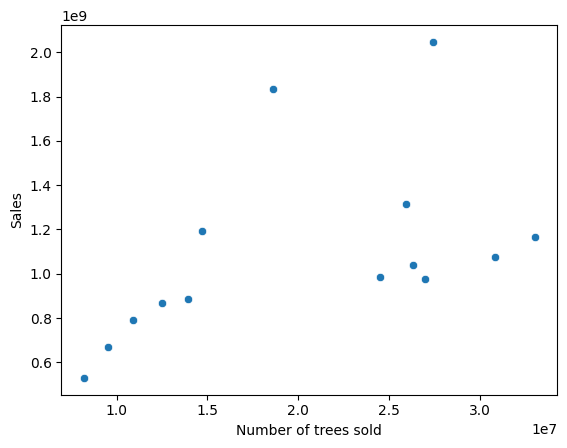

In [31]:
sns.scatterplot(data=tree_data, x="Number of trees sold", y="Sales")
plt.show()

In [32]:
correlation_coefficient_2 = tree_data['Number of trees sold'].corr(tree_data['Sales'])
print(correlation_coefficient_2)

0.4947226583412043


The correlation is positive and stronger than the other relation but still moderate

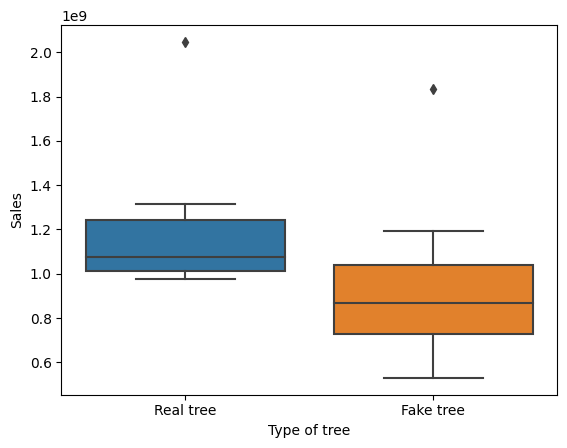

In [30]:
sns.boxplot(data = tree_data, x = tree_data['Type of tree'], y = tree_data['Sales'])

plt.show()

There is no relation between these two variables bc it doesn't overlap

<Axes: >

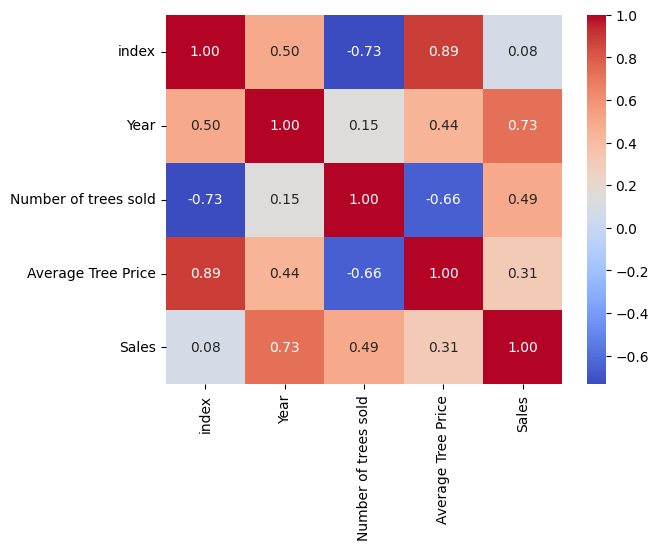

In [35]:
numeric_columns = tree_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = tree_data[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

Correlation is strong between Year and Sales

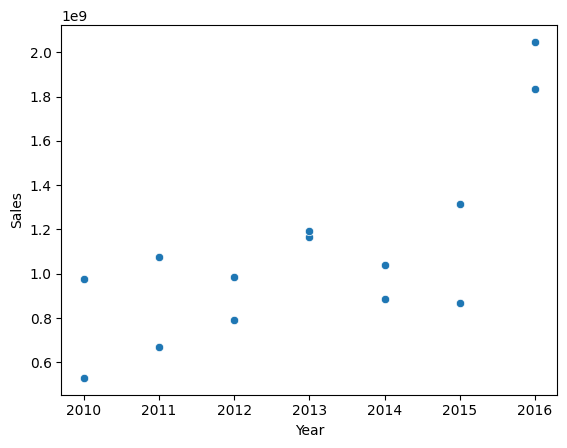

In [36]:
sns.scatterplot(data=tree_data, x="Year", y="Sales")
plt.show()

In [37]:
correlation_coefficient_3 = tree_data['Year'].corr(tree_data['Sales'])
print(correlation_coefficient_3)

0.7287220938027074


positive and strong relation !